In [4]:
import pycaret
import pandas as pd

In [5]:
# ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏ü‡∏•‡πå CSV
data = pd.read_csv('../../export_data_jsp01/clean_data_jsps001_1d.csv')

In [6]:
# ‡∏ï‡∏±‡πâ‡∏á 'timestamp' ‡πÄ‡∏õ‡πá‡∏ô index ‡∏´‡∏≤‡∏Å‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏ó‡∏≥
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ freq ‡πÉ‡∏´‡πâ‡∏Å‡∏±‡∏ö index
data = data.asfreq('D')  # 'D' ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏≤‡∏¢‡∏ß‡∏±‡∏ô

# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°
print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:")
print(data[data.isnull().any(axis=1)])

# ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏≤‡∏£ interpolate ‡πÅ‡∏ö‡∏ö‡πÄ‡∏™‡πâ‡∏ô‡∏ï‡∏£‡∏á
data.interpolate(method='linear', inplace=True)

# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤ NaN ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡πÄ‡∏ï‡∏¥‡∏° (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ)
missing_rows_after = data[data.isnull().any(axis=1)]
if not missing_rows_after.empty:
    print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏´‡∏•‡∏±‡∏á‡πÄ‡∏ï‡∏¥‡∏°:")
    print(missing_rows_after)
else:
    print("‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß")


# row = data.loc["2023-09-30 07:00:00"]
# row

‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:
Empty DataFrame
Columns: [humidity, pm_2_5, temperature]
Index: []
‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß


In [7]:
data = data[['temperature']]

In [8]:
data["year"] = data.index.year
data["month"] = data.index.month
data["day"] = data.index.day
data["day_of_week"] = data.index.dayofweek  # 0 = Monday, 6 = Sunday
data["week_of_year"] = data.index.isocalendar().week  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô int64

# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ index ‡πÄ‡∏õ‡πá‡∏ô datetime ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
def assign_season(month):
    if month in [2, 3, 4]:  # ‡∏Å.‡∏û. - ‡πÄ‡∏°.‡∏¢.
        return "summer"        # ‡∏§‡∏î‡∏π‡∏£‡πâ‡∏≠‡∏ô
    elif month in [5, 6, 7]:  # ‡∏û.‡∏Ñ. - ‡∏Å.‡∏Ñ.
        return "early_rainy"   # ‡∏ï‡πâ‡∏ô‡∏§‡∏î‡∏π‡∏ù‡∏ô
    else:  # ‡∏™.‡∏Ñ. - ‡∏°.‡∏Ñ.
        return "late_rainy"    # ‡∏õ‡∏•‡∏≤‡∏¢‡∏§‡∏î‡∏π‡∏ù‡∏ô

season_mapping = {'summer': 0, 'early_rainy': 1, 'late_rainy': 2}
data["season"] = data.index.month.map(assign_season)
data['season'] = data['season'].map(season_mapping)

data["is_weekend"] = data.index.dayofweek.isin([5, 6]).astype(int)

import pandas as pd
import numpy as np

# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤‡∏°‡∏µ DataFrame data ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_year
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['day_of_year'] = data['date'].dt.dayofyear

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå month_sin ‡πÅ‡∏•‡∏∞ month_cos
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_week_sin ‡πÅ‡∏•‡∏∞ day_of_week_cos
data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

lag_size = 7
for i in range(1,lag_size+1):
    data[f'temperature_lag_{i}'] = data['temperature'].shift(i)


In [9]:
data_filtered = data.loc['2023-09':]  # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏±‡πâ‡∏á‡πÅ‡∏ï‡πà‡∏Å‡∏±‡∏ô‡∏¢‡∏≤‡∏¢‡∏ô 2023 ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏ô‡πÑ‡∏õ

In [10]:
# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
total_data = len(data_filtered)

# ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô test data
test_days = 30

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏™‡∏±‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á 30 ‡∏ß‡∏±‡∏ô‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
test_size = test_days / total_data

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_filtered, test_size=test_size, shuffle=False)



In [11]:
from pycaret.regression import load_model, predict_model

model_temp = load_model("ada_and_dt_jsps01_temp_model")

Transformation Pipeline and Model Successfully Loaded


In [12]:
data_compare = data_filtered.loc[:'2025-01-12']
result = pd.DataFrame()

start_date = "2025-01-13"
end_date = "2025-02-11"

model = model_temp

for date in pd.date_range(start=start_date, end=end_date, freq="D"):
    # Drop columns
    test_1 = data_filtered
    # ‡∏î‡∏∂‡∏á‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏°‡∏≤
    test_1 = test_1.loc[str(date.date())]

    # ‡πÉ‡∏™‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ
    data_compare = pd.concat([data_compare, test_1], axis=0)

    for i in range(1,lag_size+1):
        data_compare[f'temperature_lag_{i}'] = data_compare['temperature'].shift(i)

    # ‡∏î‡∏∂‡∏á
    test_1 = (data_compare.loc[str(date.date())]).drop(columns=['temperature'])
    
    # Drop ‡∏ó‡∏¥‡πâ‡∏á‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î‡πÉ‡∏ô data_compare
    data_compare = data_compare.drop(data_compare.last_valid_index())
    test_1 = test_1[~test_1.index.duplicated(keep='last')]

    # Predict
    predict_test_1 = predict_model(model, data=test_1)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ‡πÉ‡∏ô data_compare
    data_compare = pd.concat([data_compare, predict_test_1], axis=0)

    # ‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'pm_2_5' ‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà '2025-01-13' ‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label'
    data_compare.loc[str(date.date()), 'temperature'] = data_compare.loc[str(date.date()), 'prediction_label']

    # ‡∏•‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label' (‡∏´‡∏≤‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÅ‡∏Ñ‡πà‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢)
    data_compare = data_compare.drop(columns=['prediction_label'])

    # ‡∏Å‡∏£‡∏≠‡∏á‡πÄ‡∏≠‡∏≤‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ã‡πâ‡∏≥‡∏Å‡∏±‡∏ô (index ‡∏ã‡πâ‡∏≥) ‡∏≠‡∏≠‡∏Å‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÅ‡∏Ñ‡πà‡∏ï‡∏±‡∏ß‡πÄ‡∏î‡∏µ‡∏¢‡∏ß
    data_compare = data_compare[~data_compare.index.duplicated(keep='last')]

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏•‡∏á result
    result = pd.concat([result, predict_test_1], axis=0)

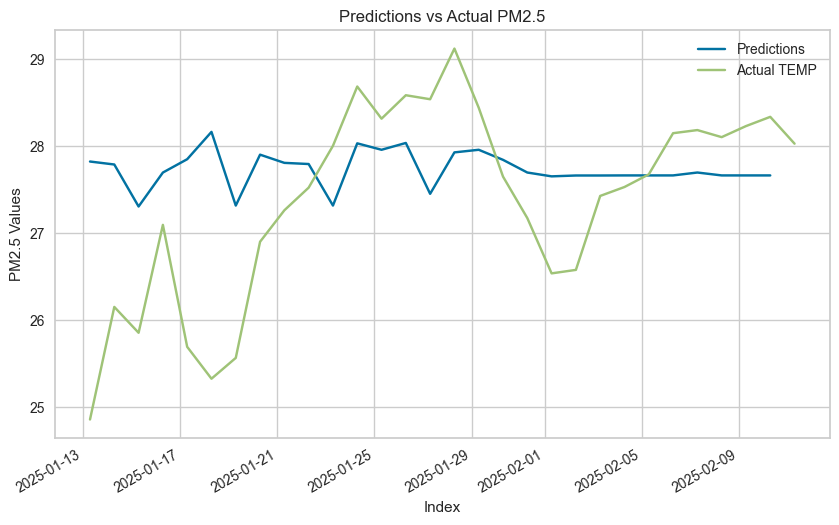

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = data_filtered.loc[start_date:end_date]
# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result_plot = pd.concat([result['prediction_label'].shift(-1), real_data['temperature']], axis=1)
result_plot.columns = ['Predictions', 'Actual TEMP']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result_plot.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual PM2.5')
plt.xlabel('Index')
plt.ylabel('PM2.5 Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

In [14]:
y_true = test_data["temperature"][:"2025-2-10"]
y_pred = result["prediction_label"].shift(-1).dropna(axis=0)

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: -0.1035
Mean Absolute Error (MAE): 0.9031
Root Mean Squared Error (RMSE): 1.1676
Mean Absolute Percentage Error (MAPE): 3.39%
Accuracy: 96.61%


In [16]:
result.tail()

year  month  day  day_of_week  week_of_year  season  \
timestamp                                                                  
2025-02-07 07:00:00  2025      2    7            4             6       0   
2025-02-08 07:00:00  2025      2    8            5             6       0   
2025-02-09 07:00:00  2025      2    9            6             6       0   
2025-02-10 07:00:00  2025      2   10            0             7       0   
2025-02-11 07:00:00  2025      2   11            1             7       0   

                     is_weekend       date  day_of_year  month_sin  ...  \
timestamp                                                           ...   
2025-02-07 07:00:00           0 2025-02-07           38   0.866025  ...   
2025-02-08 07:00:00           1 2025-02-08           39   0.866025  ...   
2025-02-09 07:00:00           1 2025-02-09           40   0.866025  ...   
2025-02-10 07:00:00           0 2025-02-10           41   0.866025  ...   
2025-02-11 07:00:00           0 2025-02-11           42   0.866025  ...   

                     day_of_week_sin  day_of_week_cos  temperature_lag_1  \
timestamp                                                                  
2025-02-07 07:00:00        -0.433884        -0.900969          27.664705   
2025-02-08 07:00:00        -0.974928        -0.222521          27.664705   
2025-02-09 07:00:00        -0.781832         0.623490          27.697985   
2025-02-10 07:00:00         0.000000         1.000000          27.664705   
2025-02-11 07:00:00         0.781832         0.623490          27.664705   

                     temperature_lag_2  temperature_lag_3  temperature_lag_4  \
timestamp                                                                      
2025-02-07 07:00:00          27.664705          27.663752          27.663752   
2025-02-08 07:00:00          27.664705          27.664705          27.663752   
2025-02-09 07:00:00          27.664705          27.664705          27.664705   
2025-02-10 07:00:00          27.697985          27.664705          27.664705   
2025-02-11 07:00:00          27.664705          27.697985          27.664705   

                     temperature_lag_5  temperature_lag_6  temperature_lag_7  \
timestamp                                                                      
2025-02-07 07:00:00          27.653965          27.697985          27.843803   
2025-02-08 07:00:00          27.663752          27.653965          27.697985   
2025-02-09 07:00:00          27.663752          27.663752          27.653965   
2025-02-10 07:00:00          27.664705          27.663752          27.663752   
2025-02-11 07:00:00          27.664705          27.664705          27.663752   

                     prediction_label  
timestamp                              
2025-02-07 07:00:00         27.664705  
2025-02-08 07:00:00         27.697985  
2025-02-09 07:00:00         27.664705  
2025-02-10 07:00:00         27.664705  
2025-02-11 07:00:00         27.664705  

[5 rows x 21 columns]

------------------

In [17]:
# ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏ü‡∏•‡πå CSV
data = pd.read_csv('../../export_data_jsp01/clean_data_jsps001_1d.csv')

In [18]:
# ‡∏ï‡∏±‡πâ‡∏á 'timestamp' ‡πÄ‡∏õ‡πá‡∏ô index ‡∏´‡∏≤‡∏Å‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏ó‡∏≥
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ freq ‡πÉ‡∏´‡πâ‡∏Å‡∏±‡∏ö index
data = data.asfreq('D')  # 'D' ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏≤‡∏¢‡∏ß‡∏±‡∏ô

In [19]:
data.tail()

humidity     pm_2_5  temperature
timestamp                                             
2025-02-07 07:00:00  72.053758  27.864365    28.186164
2025-02-08 07:00:00  72.759274  33.923883    28.104894
2025-02-09 07:00:00  69.850659  32.647832    28.231867
2025-02-10 07:00:00  69.598712  32.856690    28.338313
2025-02-11 07:00:00  71.713989  34.038326    28.029813

In [20]:
# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°
print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:")
print(data[data.isnull().any(axis=1)])

# ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏≤‡∏£ interpolate ‡πÅ‡∏ö‡∏ö‡πÄ‡∏™‡πâ‡∏ô‡∏ï‡∏£‡∏á
data.interpolate(method='linear', inplace=True)

# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤ NaN ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡πÄ‡∏ï‡∏¥‡∏° (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ)
missing_rows_after = data[data.isnull().any(axis=1)]
if not missing_rows_after.empty:
    print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏´‡∏•‡∏±‡∏á‡πÄ‡∏ï‡∏¥‡∏°:")
    print(missing_rows_after)
else:
    print("‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß")


row = data.loc["2023-09-30 07:00:00"]
row

‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:
Empty DataFrame
Columns: [humidity, pm_2_5, temperature]
Index: []
‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß


humidity       75.436933
pm_2_5         41.697658
temperature    30.098761
Name: 2023-09-30 07:00:00, dtype: float64

In [21]:
# add temp predict column
shifted_predictions_temp = result['prediction_label'].shift(-1).iloc[:-1]

data.loc[shifted_predictions_temp.index, 'temperature'] = shifted_predictions_temp
data.tail(30)

humidity     pm_2_5  temperature
timestamp                                             
2025-01-13 07:00:00  75.720718  30.592321    27.824428
2025-01-14 07:00:00  69.815912  33.313586    27.790195
2025-01-15 07:00:00  75.254666  50.672600    27.307275
2025-01-16 07:00:00  75.413310  49.521314    27.697801
2025-01-17 07:00:00  87.503481  22.819705    27.851053
2025-01-18 07:00:00  85.722029  33.084067    28.165335
2025-01-19 07:00:00  78.304175  40.635307    27.317966
2025-01-20 07:00:00  76.309167  49.684027    27.903474
2025-01-21 07:00:00  77.957346  46.786058    27.809075
2025-01-22 07:00:00  77.775011  43.888089    27.795735
2025-01-23 07:00:00  72.026358  40.577017    27.317966
2025-01-24 07:00:00  71.435957  44.376693    28.033634
2025-01-25 07:00:00  78.005603  41.808726    27.959576
2025-01-26 07:00:00  76.766380  42.700908    28.038013
2025-01-27 07:00:00  75.314715  27.720182    27.453160
2025-01-28 07:00:00  69.657851  28.658365    27.929518
2025-01-29 07:00:00  72.195499  25.836471    27.959576
2025-01-30 07:00:00  70.817757  34.602027    27.843804
2025-01-31 07:00:00  68.361925  33.967001    27.697985
2025-02-01 07:00:00  73.127154  39.954672    27.653966
2025-02-02 07:00:00  74.573612  43.738720    27.663752
2025-02-03 07:00:00  66.783050  53.791623    27.663752
2025-02-04 07:00:00  71.844422  33.424542    27.664705
2025-02-05 07:00:00  70.575618  29.342907    27.664705
2025-02-06 07:00:00  70.853854  28.153336    27.664705
2025-02-07 07:00:00  72.053758  27.864365    27.697985
2025-02-08 07:00:00  72.759274  33.923883    27.664705
2025-02-09 07:00:00  69.850659  32.647832    27.664705
2025-02-10 07:00:00  69.598712  32.856690    27.664705
2025-02-11 07:00:00  71.713989  34.038326    28.029813

In [22]:
data = data[['humidity', 'temperature']]

In [23]:
data["year"] = data.index.year
data["month"] = data.index.month
data["day"] = data.index.day
data["day_of_week"] = data.index.dayofweek  # 0 = Monday, 6 = Sunday
data["week_of_year"] = data.index.isocalendar().week  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô int64

In [24]:
# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ index ‡πÄ‡∏õ‡πá‡∏ô datetime ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
def assign_season(month):
    if month in [2, 3, 4]:  # ‡∏Å.‡∏û. - ‡πÄ‡∏°.‡∏¢.
        return "summer"        # ‡∏§‡∏î‡∏π‡∏£‡πâ‡∏≠‡∏ô
    elif month in [5, 6, 7]:  # ‡∏û.‡∏Ñ. - ‡∏Å.‡∏Ñ.
        return "early_rainy"   # ‡∏ï‡πâ‡∏ô‡∏§‡∏î‡∏π‡∏ù‡∏ô
    else:  # ‡∏™.‡∏Ñ. - ‡∏°.‡∏Ñ.
        return "late_rainy"    # ‡∏õ‡∏•‡∏≤‡∏¢‡∏§‡∏î‡∏π‡∏ù‡∏ô

season_mapping = {'summer': 0, 'early_rainy': 1, 'late_rainy': 2}
data["season"] = data.index.month.map(assign_season)
data['season'] = data['season'].map(season_mapping)

In [25]:
data["is_weekend"] = data.index.dayofweek.isin([5, 6]).astype(int)

In [26]:
import pandas as pd
import numpy as np

# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤‡∏°‡∏µ DataFrame data ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_year
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['day_of_year'] = data['date'].dt.dayofyear

# # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå month_sin ‡πÅ‡∏•‡∏∞ month_cos
# data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
# data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

# # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_week_sin ‡πÅ‡∏•‡∏∞ day_of_week_cos
# data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
# data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

lag_size = 7
for i in range(1,lag_size+1):
    data[f'humidity_lag_{i}'] = data['humidity'].shift(i)

for i in range(1,lag_size+1):
    data[f'temperature_lag_{i}'] = data['temperature'].shift(i)

In [27]:
# data["temp_diff"] = data["temperature"].diff()

In [28]:
data.columns

Index(['humidity', 'temperature', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'season', 'is_weekend', 'date', 'day_of_year',
       'humidity_lag_1', 'humidity_lag_2', 'humidity_lag_3', 'humidity_lag_4',
       'humidity_lag_5', 'humidity_lag_6', 'humidity_lag_7',
       'temperature_lag_1', 'temperature_lag_2', 'temperature_lag_3',
       'temperature_lag_4', 'temperature_lag_5', 'temperature_lag_6',
       'temperature_lag_7'],
      dtype='object')

In [29]:
data_filtered = data.loc['2023-09':]  # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏±‡πâ‡∏á‡πÅ‡∏ï‡πà‡∏Å‡∏±‡∏ô‡∏¢‡∏≤‡∏¢‡∏ô 2023 ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏ô‡πÑ‡∏õ

<Axes: xlabel='timestamp'>

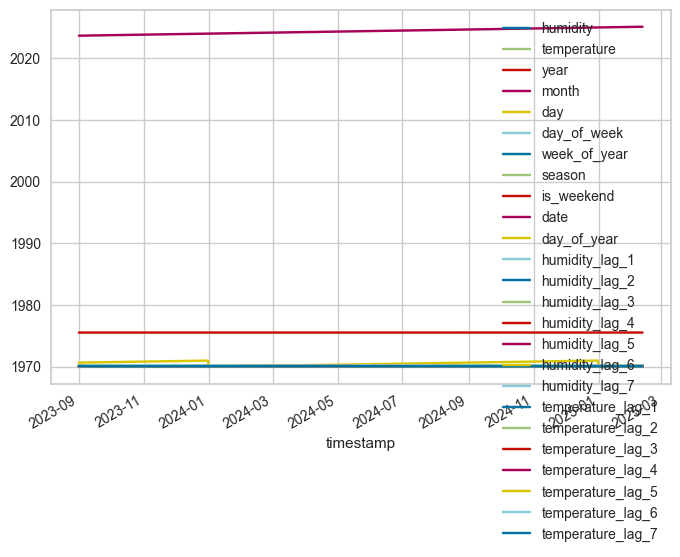

In [30]:
data_filtered.plot()

In [31]:
# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
total_data = len(data_filtered)

# ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô test data
test_days = 30

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏™‡∏±‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á 30 ‡∏ß‡∏±‡∏ô‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
test_size = test_days / total_data
test_size

0.05660377358490566

In [32]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_filtered, test_size=test_size, shuffle=False)

In [33]:
train_data.shape

(500, 25)

In [34]:
test_data.shape

(30, 25)

In [35]:
test_data.head(1)

humidity  temperature  year  month  day  day_of_week  \
timestamp                                                                    
2025-01-13 07:00:00  75.720718    27.824428  2025      1   13            0   

                     week_of_year  season  is_weekend       date  ...  \
timestamp                                                         ...   
2025-01-13 07:00:00             3       2           0 2025-01-13  ...   

                     humidity_lag_5  humidity_lag_6  humidity_lag_7  \
timestamp                                                             
2025-01-13 07:00:00       73.449632       73.350454       85.925103   

                     temperature_lag_1  temperature_lag_2  temperature_lag_3  \
timestamp                                                                      
2025-01-13 07:00:00          26.640566           28.05223          28.380074   

                     temperature_lag_4  temperature_lag_5  temperature_lag_6  \
timestamp                                                                      
2025-01-13 07:00:00          28.482274          28.022162          27.094928   

                     temperature_lag_7  
timestamp                               
2025-01-13 07:00:00          25.455684  

[1 rows x 25 columns]

In [36]:
test_data.tail(1)

humidity  temperature  year  month  day  day_of_week  \
timestamp                                                                    
2025-02-11 07:00:00  71.713989    28.029813  2025      2   11            1   

                     week_of_year  season  is_weekend       date  ...  \
timestamp                                                         ...   
2025-02-11 07:00:00             7       0           0 2025-02-11  ...   

                     humidity_lag_5  humidity_lag_6  humidity_lag_7  \
timestamp                                                             
2025-02-11 07:00:00       70.853854       70.575618       71.844422   

                     temperature_lag_1  temperature_lag_2  temperature_lag_3  \
timestamp                                                                      
2025-02-11 07:00:00          27.664705          27.664705          27.664705   

                     temperature_lag_4  temperature_lag_5  temperature_lag_6  \
timestamp                                                                      
2025-02-11 07:00:00          27.697985          27.664705          27.664705   

                     temperature_lag_7  
timestamp                               
2025-02-11 07:00:00          27.664705  

[1 rows x 25 columns]

In [37]:
test_data.columns

Index(['humidity', 'temperature', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'season', 'is_weekend', 'date', 'day_of_year',
       'humidity_lag_1', 'humidity_lag_2', 'humidity_lag_3', 'humidity_lag_4',
       'humidity_lag_5', 'humidity_lag_6', 'humidity_lag_7',
       'temperature_lag_1', 'temperature_lag_2', 'temperature_lag_3',
       'temperature_lag_4', 'temperature_lag_5', 'temperature_lag_6',
       'temperature_lag_7'],
      dtype='object')

In [38]:
from pycaret.regression import RegressionExperiment
exp1 = RegressionExperiment()
exp1.setup(data=train_data, target='humidity', session_id=123, fold=12, remove_outliers = True)

In [39]:
# compare baseline models
best = exp1.compare_models(n_select=15)

In [40]:
model_3 = exp1.create_model('br')

In [41]:
s

NameError: name 's' is not defined

In [ ]:
# exp1.evaluate_model(model_1)

In [58]:
predictions = exp1.predict_model(model_3, data=test_data)
predict_v = predictions['prediction_label']
real = test_data['humidity']

In [ ]:
# exp1.plot_model(model_2, 'learning')

# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ 1 ‡∏ß‡∏±‡∏ô‡∏Ç‡πâ‡∏≤‡∏á‡∏´‡∏ô‡πâ‡∏≤ ‡∏ï‡πâ‡∏≠‡∏á‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏ú‡∏∑‡πà‡∏≠ 2 ‡∏ß‡∏±‡∏ô

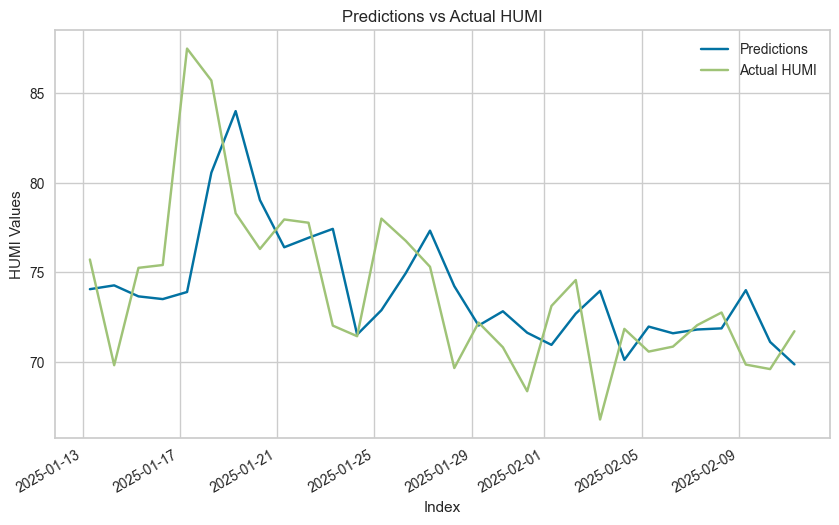

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result = pd.concat([predict_v, test_data['humidity']], axis=1)
result.columns = ['Predictions', 'Actual HUMI']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual HUMI')
plt.xlabel('Index')
plt.ylabel('HUMI Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

In [60]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_true = test_data["humidity"][:"2025-2-10"]
y_pred = predict_v.shift(-1).dropna(axis=0)

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Accuracy as (1 - (MAE / mean_actual)) * 100
mean_actual = np.mean(y_true)  # Mean of actual values
accuracy = (1 - (mae / mean_actual)) * 100  # Accuracy in percentage

# Print Results
print(f"R¬≤ Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Absolute Error (MAE): {mae:.4f}")  # Lower is better
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  # Lower is better
print(f"Accuracy: {accuracy:.2f}%")  # Accuracy percentage

R¬≤ Score: 0.8087
Mean Absolute Error (MAE): 1.4440
Root Mean Squared Error (RMSE): 2.0202
Accuracy: 98.05%


In [62]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Extract actual values and predicted values
y_true = test_data["humidity"][:7]
y_pred = (predict_v.shift(-1).dropna(axis=0))[:7]

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: 0.6876
Mean Absolute Error (MAE): 2.5605
Root Mean Squared Error (RMSE): 3.2453
Mean Absolute Percentage Error (MAPE): 3.23%
Accuracy: 96.77%


# Predict 1 by 1

30 ‡∏ß‡∏±‡∏ô  
2025-01-13 07:00:00  
2025-02-11 07:00:00  
7 ‡∏ß‡∏±‡∏ô  
2025-02-05  
2025-02-11  
24 ‡∏ß‡∏±‡∏ô  
2025-01-19 07:00:00  
31 ‡∏ß‡∏±‡∏ô
2025-01-12 07:00:00

In [47]:
data_compare = data_filtered.loc[:'2025-01-12']
result = pd.DataFrame()

start_date = "2025-01-13"
end_date = "2025-02-11"

model = model_3

for date in pd.date_range(start=start_date, end=end_date, freq="D"):
    # Drop columns
    test_1 = data_filtered
    # ‡∏î‡∏∂‡∏á‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏°‡∏≤
    test_1 = test_1.loc[str(date.date())]

    # ‡πÉ‡∏™‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ
    data_compare = pd.concat([data_compare, test_1], axis=0)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå rolling average (‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÄ‡∏Ñ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏ó‡∏µ‡πà)

    # data_compare['pm_2_5_rolling_7'] = data_compare['pm_2_5'].rolling(window=7).mean().shift(1)  # ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ 5 ‡∏ß‡∏±‡∏ô‡∏Ç‡∏≠‡∏á PM 10

    for i in range(1,lag_size+1):
        data_compare[f'humidity_lag_{i}'] = data_compare['humidity'].shift(i)

    # ‡∏î‡∏∂‡∏á
    test_1 = (data_compare.loc[str(date.date())]).drop(columns=['humidity'])
    
    # Drop ‡∏ó‡∏¥‡πâ‡∏á‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î‡πÉ‡∏ô data_compare
    data_compare = data_compare.drop(data_compare.last_valid_index())
    test_1 = test_1[~test_1.index.duplicated(keep='last')]

    # Predict
    predict_test_1 = exp1.predict_model(model, data=test_1)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ‡πÉ‡∏ô data_compare
    data_compare = pd.concat([data_compare, predict_test_1], axis=0)

    # ‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'pm_2_5' ‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà '2025-01-13' ‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label'
    data_compare.loc[str(date.date()), 'humidity'] = data_compare.loc[str(date.date()), 'prediction_label']

    # ‡∏•‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label' (‡∏´‡∏≤‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÅ‡∏Ñ‡πà‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢)
    data_compare = data_compare.drop(columns=['prediction_label'])

    # ‡∏Å‡∏£‡∏≠‡∏á‡πÄ‡∏≠‡∏≤‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ã‡πâ‡∏≥‡∏Å‡∏±‡∏ô (index ‡∏ã‡πâ‡∏≥) ‡∏≠‡∏≠‡∏Å‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÅ‡∏Ñ‡πà‡∏ï‡∏±‡∏ß‡πÄ‡∏î‡∏µ‡∏¢‡∏ß
    data_compare = data_compare[~data_compare.index.duplicated(keep='last')]

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏•‡∏á result
    result = pd.concat([result, predict_test_1], axis=0)

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = data_filtered.loc[start_date:end_date]
# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result_plot = pd.concat([result['prediction_label'].shift(-1), real_data['humidity']], axis=1)
result_plot.columns = ['Predictions', 'Actual HUMI']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result_plot.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual HUMI')
plt.xlabel('Index')
plt.ylabel('HUMI Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

KeyError: 'prediction_label'

In [54]:
y_true = test_data["humidity"][:"2025-2-10"]
y_pred = result['prediction_label'].shift(-1).dropna(axis=0)

In [52]:
y_true = test_data["humidity"][:7]
y_pred = (result['prediction_label'].shift(-1).dropna(axis=0))[:7]

In [55]:
# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: -0.0558
Mean Absolute Error (MAE): 3.7147
Root Mean Squared Error (RMSE): 4.7467
Mean Absolute Percentage Error (MAPE): 4.94%
Accuracy: 95.06%


In [ ]:
exp1.save_model(model_3, "br_humi_u_temp_model_jsps01")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['temperature', 'year', 'month',
                                              'day', 'day_of_week',
                                              'week_of_year', 'season',
                                              'is_weekend', 'day_of_year',
                                              'humidity_lag_1', 'humidity_lag_2',
                                              'humidity_lag_3', 'hu...
                                              'temperature_lag_3',
                                              'temperature_lag_4',
                                              'temperature_lag_5',
                                              'temperature_lag_6',
                              

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ‡πÅ‡∏õ‡∏•‡∏á index ‡πÄ‡∏õ‡πá‡∏ô datetime ‡πÅ‡∏•‡∏∞‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å
x = data_filtered.copy()
x.index = pd.to_datetime(x.index).normalize()

# ‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
result_dict = {}

# ‡∏£‡∏≤‡∏¢‡∏ä‡∏∑‡πà‡∏≠‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏à‡∏≤‡∏Å best_list
model_names = {model.__class__.__name__: model for model in best}

start_date = "2025-01-13"
end_date = "2025-02-11"

# ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏ú‡πà‡∏≤‡∏ô‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
for model_name, model in model_names.items():
    print(f"Processing model: {model_name}")

    data_compare = x.loc[:'2025-01-12'].copy()  # ‡πÉ‡∏ä‡πâ copy() ‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô Warning
    result = pd.DataFrame()

    for date in pd.date_range(start=start_date, end=end_date, freq="D"):
        # ‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà
        date = pd.to_datetime(date).normalize()  # ‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£ date

        # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡πÉ‡∏ô x ‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ô‡∏µ‡πâ‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà
        if date not in x.index:
            print(f"‚ö†Ô∏è Warning: Date {date} not found in x index.")
            continue

        # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£
        test_1 = x.loc[[date]].copy()

        # ‡πÉ‡∏™‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ
        data_compare = pd.concat([data_compare, test_1], axis=0)

        # ‡πÄ‡∏û‡∏¥‡πà‡∏° lag feature
        for i in range(1, lag_size + 1):
            test_1[f'humidity_lag_{i}'] = data_compare['humidity'].shift(i).iloc[-1]

        # ‡∏•‡∏ö‡∏Ñ‡πà‡∏≤ NaN ‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£ shift
        test_1 = test_1.dropna()

        # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤
        predict_test_1 = exp1.predict_model(model, data=test_1)

        # ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï data_compare
        predict_test_1.index = [date]  # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î index ‡πÄ‡∏õ‡πá‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå
        data_compare.loc[date, 'humidity'] = predict_test_1['prediction_label'].values[0]

        # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
        result = pd.concat([result, predict_test_1], axis=0)

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ‡∏•‡∏á dict
    result_dict[model_name] = result

# --------------------------------------------
# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
# --------------------------------------------
real_data = x.loc[start_date:end_date]

# ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
for model_name, result in result_dict.items():
    plt.figure(figsize=(12, 6))
    
    result_plot = pd.concat([result['prediction_label'], real_data['humidity']], axis=1)
    result_plot.columns = ['Predictions', 'Actual TEMP']

    plt.plot(result_plot.index, result_plot['Predictions'], label=f"Predicted ({model_name})")
    plt.plot(real_data.index, real_data['humidity'], label="Actual TEMP", color="black", linewidth=2)
    
    # ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏Å‡∏£‡∏≤‡∏ü
    plt.title(f'Predictions vs Actual TEMP for {model_name}')
    plt.xlabel('Date')
    plt.ylabel('TEMP Values')
    plt.legend()

    # ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
    plt.show()

Processing model: BayesianRidge


Processing model: Ridge


Processing model: LinearRegression


Processing model: ExtraTreesRegressor


KeyboardInterrupt: 

In [ ]:
# --------------------------------------------
# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡πÅ‡∏•‡∏∞‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏• Regression Metrics (‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü)
# --------------------------------------------
for model_name, result in result_dict.items():
    y_true = x.loc[start_date:end_date, 'humidity']  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
    y_pred = result['prediction_label']

    # ‡∏•‡∏ö NaN ‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£ shift
    valid_idx = y_pred.dropna().index
    y_true = y_true.loc[valid_idx]
    y_pred = y_pred.loc[valid_idx]

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    accuracy = 100 - mape  # ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô Accuracy %

    # ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡πà‡∏≤ Metrics ‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ
    print("\nüìä Model Performance Metrics:")
    print(f"Model: {model_name}")
    print(f"R¬≤ Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Accuracy: {accuracy:.2f}%")
    print("-" * 50)


üìä Model Performance Metrics:
Model: BayesianRidge
R¬≤ Score: -0.1009
Mean Absolute Error (MAE): 3.6258
Root Mean Squared Error (RMSE): 4.7850
Mean Absolute Percentage Error (MAPE): 4.82%
Accuracy: 95.18%
--------------------------------------------------

üìä Model Performance Metrics:
Model: Ridge
R¬≤ Score: -0.1031
Mean Absolute Error (MAE): 3.6144
Root Mean Squared Error (RMSE): 4.7897
Mean Absolute Percentage Error (MAPE): 4.80%
Accuracy: 95.20%
--------------------------------------------------

üìä Model Performance Metrics:
Model: LinearRegression
R¬≤ Score: -0.0967
Mean Absolute Error (MAE): 3.7248
Root Mean Squared Error (RMSE): 4.7759
Mean Absolute Percentage Error (MAPE): 4.98%
Accuracy: 95.02%
--------------------------------------------------

üìä Model Performance Metrics:
Model: ExtraTreesRegressor
R¬≤ Score: -0.7658
Mean Absolute Error (MAE): 5.1692
Root Mean Squared Error (RMSE): 6.0601
Mean Absolute Percentage Error (MAPE): 7.12%
Accuracy: 92.88%
--------------